In [37]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import scipy.stats as stats
import sklearn
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [38]:
from sklearn.datasets import load_boston
boston = load_boston()


In [39]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [40]:
bos = pd.DataFrame(boston.data, columns=boston.feature_names)

In [41]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [47]:
bos['MEDV'] = boston.target

In [48]:
bos.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [49]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [50]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

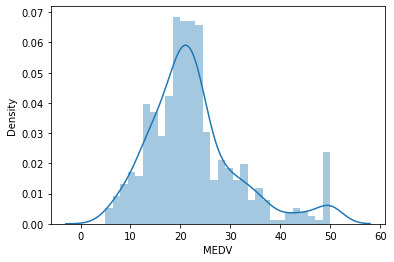

In [51]:
sn.distplot(bos['MEDV'],bins=30)

We can clearly conclude from the above plot that our target variable is normally distributed so we do not need to make changes in the data.

In [54]:
print(np.mean(bos['MEDV']))
print(np.median(bos['MEDV']))

22.532806324110698
21.2


In [56]:
print(bos['MEDV'].mode()[0])

50.0


Now, we can see the correlation between our target variable and the independent variables.

In [58]:
bos_cor=bos.corr()
print(bos_cor)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<AxesSubplot:>

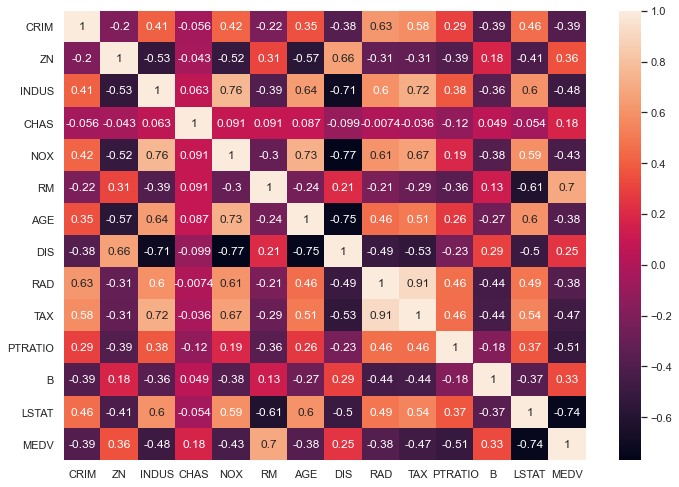

In [62]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.heatmap(bos_cor,annot=True)

We can see that variables like RM and LSTAT are highly correlated to our target

In [63]:
X=bos.iloc[:,:-1]

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [66]:
calc_vif(X)

,variables,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


We can see that variable like  Indus,Nox, RM,age ,tax,ptratio ,B have very high VIF value i.e. these possess high multicollinearity

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

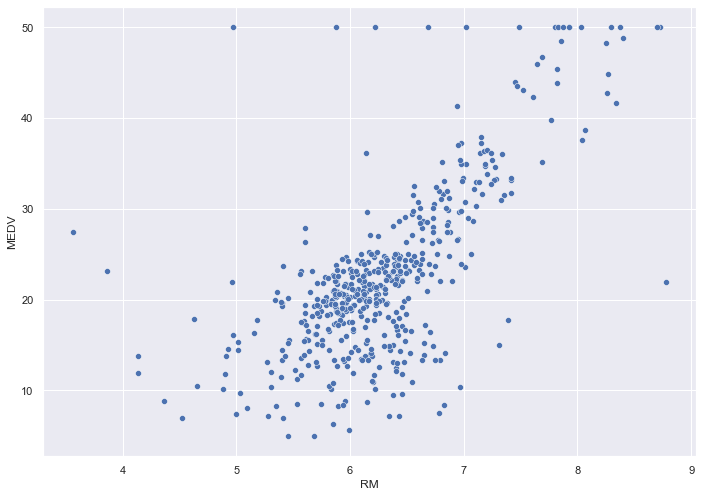

In [68]:
sn.scatterplot(data=bos, x=bos['RM'], y=bos['MEDV'])

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

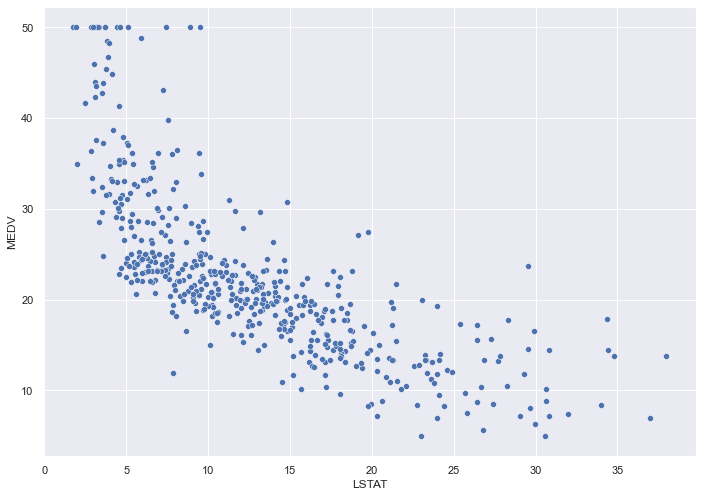

In [72]:
sn.scatterplot(data=bos, x=bos['LSTAT'], y=bos['MEDV'])

In [78]:
new_bos=pd.DataFrame(data={'lstat':bos['LSTAT'],'rm':bos['RM']})

In [80]:
new_bos.head()

,lstat,rm
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147


In [81]:
X=new_bos
Y=bos['MEDV']

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lreg = LinearRegression()
lreg.fit(X_train, Y_train)

print ('Coefficients: ', lreg.coef_[0])
print ('Intercept: ',lreg.intercept_)

Coefficients:  -0.7172295427415406
Intercept:  2.7362403426066138


In [91]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lreg.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lreg.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")

print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
RMSE is 5.137400784702911
R2 score is 0.6628996975186953
